Upload file CSV Anda (atau skip untuk menggunakan data contoh)
Format kolom: wilayah, jumlah_pendidik, jumlah_sekolah

EKSPLORASI DATA AWAL

 5 Data Teratas:
          wilayah  jumlah_pendidik  jumlah_sekolah
0     DKI Jakarta            15000             450
1      Jawa Barat            25000             850
2     Jawa Tengah            20000             750
3      Jawa Timur            23000             800
4  Sumatera Utara            12000             400

 Statistik Deskriptif:
       jumlah_pendidik  jumlah_sekolah
count        24.000000       24.000000
mean       7937.500000      299.583333
std        6573.385899      214.830149
min        1800.000000       90.000000
25%        3725.000000      167.500000
50%        5750.000000      235.000000
75%        8875.000000      327.500000
max       25000.000000      850.000000

 Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype

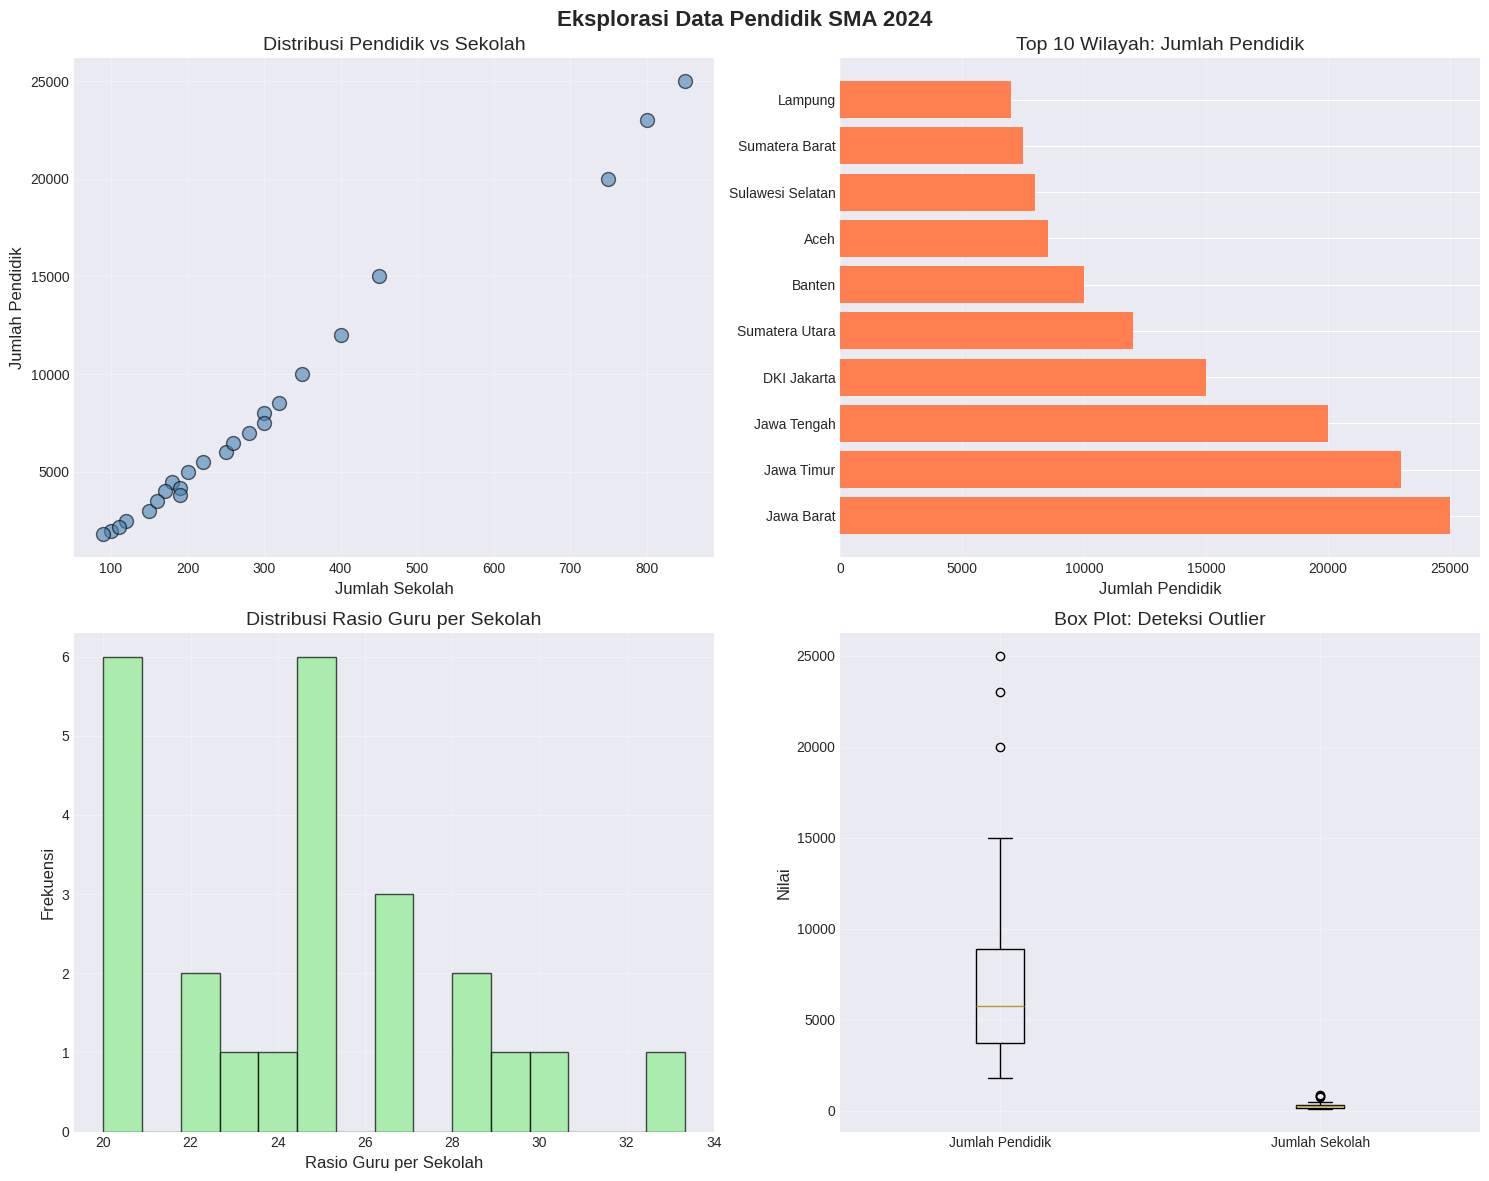


PERSIAPAN DATA

 Fitur yang digunakan: ['jumlah_pendidik', 'jumlah_sekolah']
 Shape data: (24, 2)

 Data sebelum normalisasi (5 data pertama):
[[15000   450]
 [25000   850]
 [20000   750]
 [23000   800]
 [12000   400]]

 Data setelah normalisasi (5 data pertama):
[[1.09751644 0.71522458]
 [2.65152202 2.61720686]
 [1.87451923 2.14171129]
 [2.34072091 2.37945908]
 [0.63131477 0.4774768 ]]

MENENTUKAN JUMLAH CLUSTER OPTIMAL


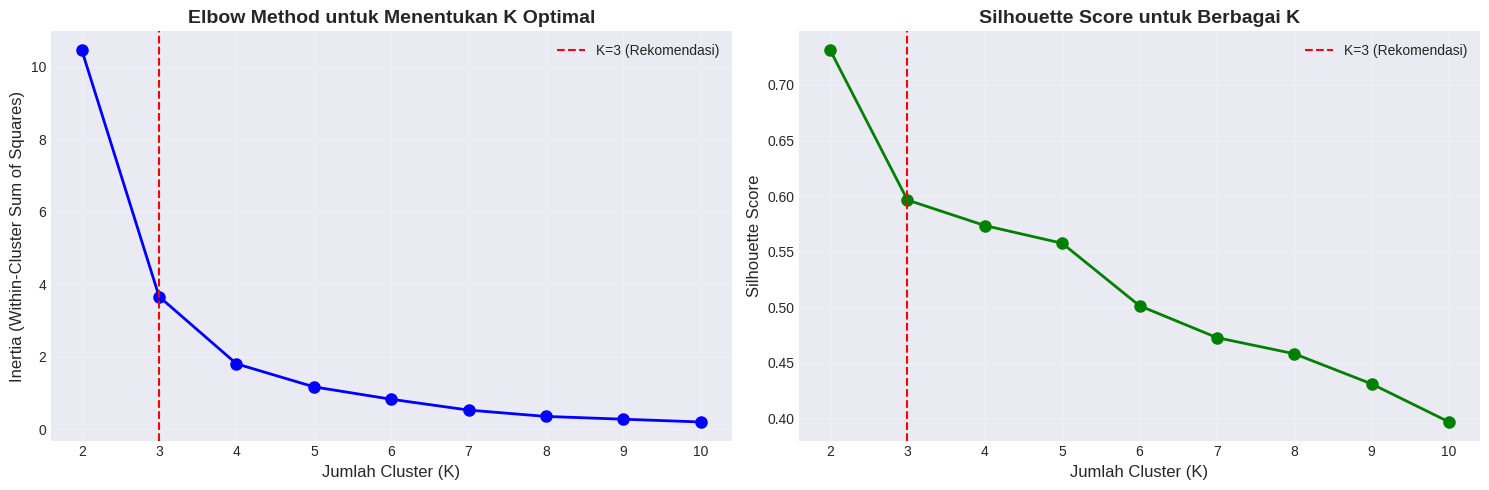


 Evaluasi untuk berbagai K:
 K   Inertia  Silhouette Score
 2 10.467361          0.731571
 3  3.662624          0.596419
 4  1.808707          0.573437
 5  1.173294          0.557479
 6  0.830915          0.501176
 7  0.532124          0.472502
 8  0.357063          0.457985
 9  0.280502          0.430821
10  0.203941          0.396541

IMPLEMENTASI K-MEANS CLUSTERING

 Jumlah cluster yang dipilih: K = 3

 Clustering selesai!
 Jumlah iterasi: 2
 Inertia: 3.66
 Silhouette Score: 0.596
 Davies-Bouldin Index: 0.466

ANALISIS HASIL CLUSTERING

 CLUSTER 0
Jumlah wilayah: 13
Rata-rata jumlah pendidik: 3692
Rata-rata jumlah sekolah: 164
Rata-rata rasio guru/sekolah: 22.10

Wilayah dalam cluster:
  • Kalimantan Timur
  • Papua
  • Maluku
  • Bali
  • NTB
  • Sulawesi Utara
  • Kalimantan Selatan
  • Jambi
  • Bengkulu
  • NTT
  • Papua Barat
  • Gorontalo
  • Maluku Utara

 CLUSTER 1
Jumlah wilayah: 3
Rata-rata jumlah pendidik: 22667
Rata-rata jumlah sekolah: 800
Rata-rata rasio guru/sekolah:

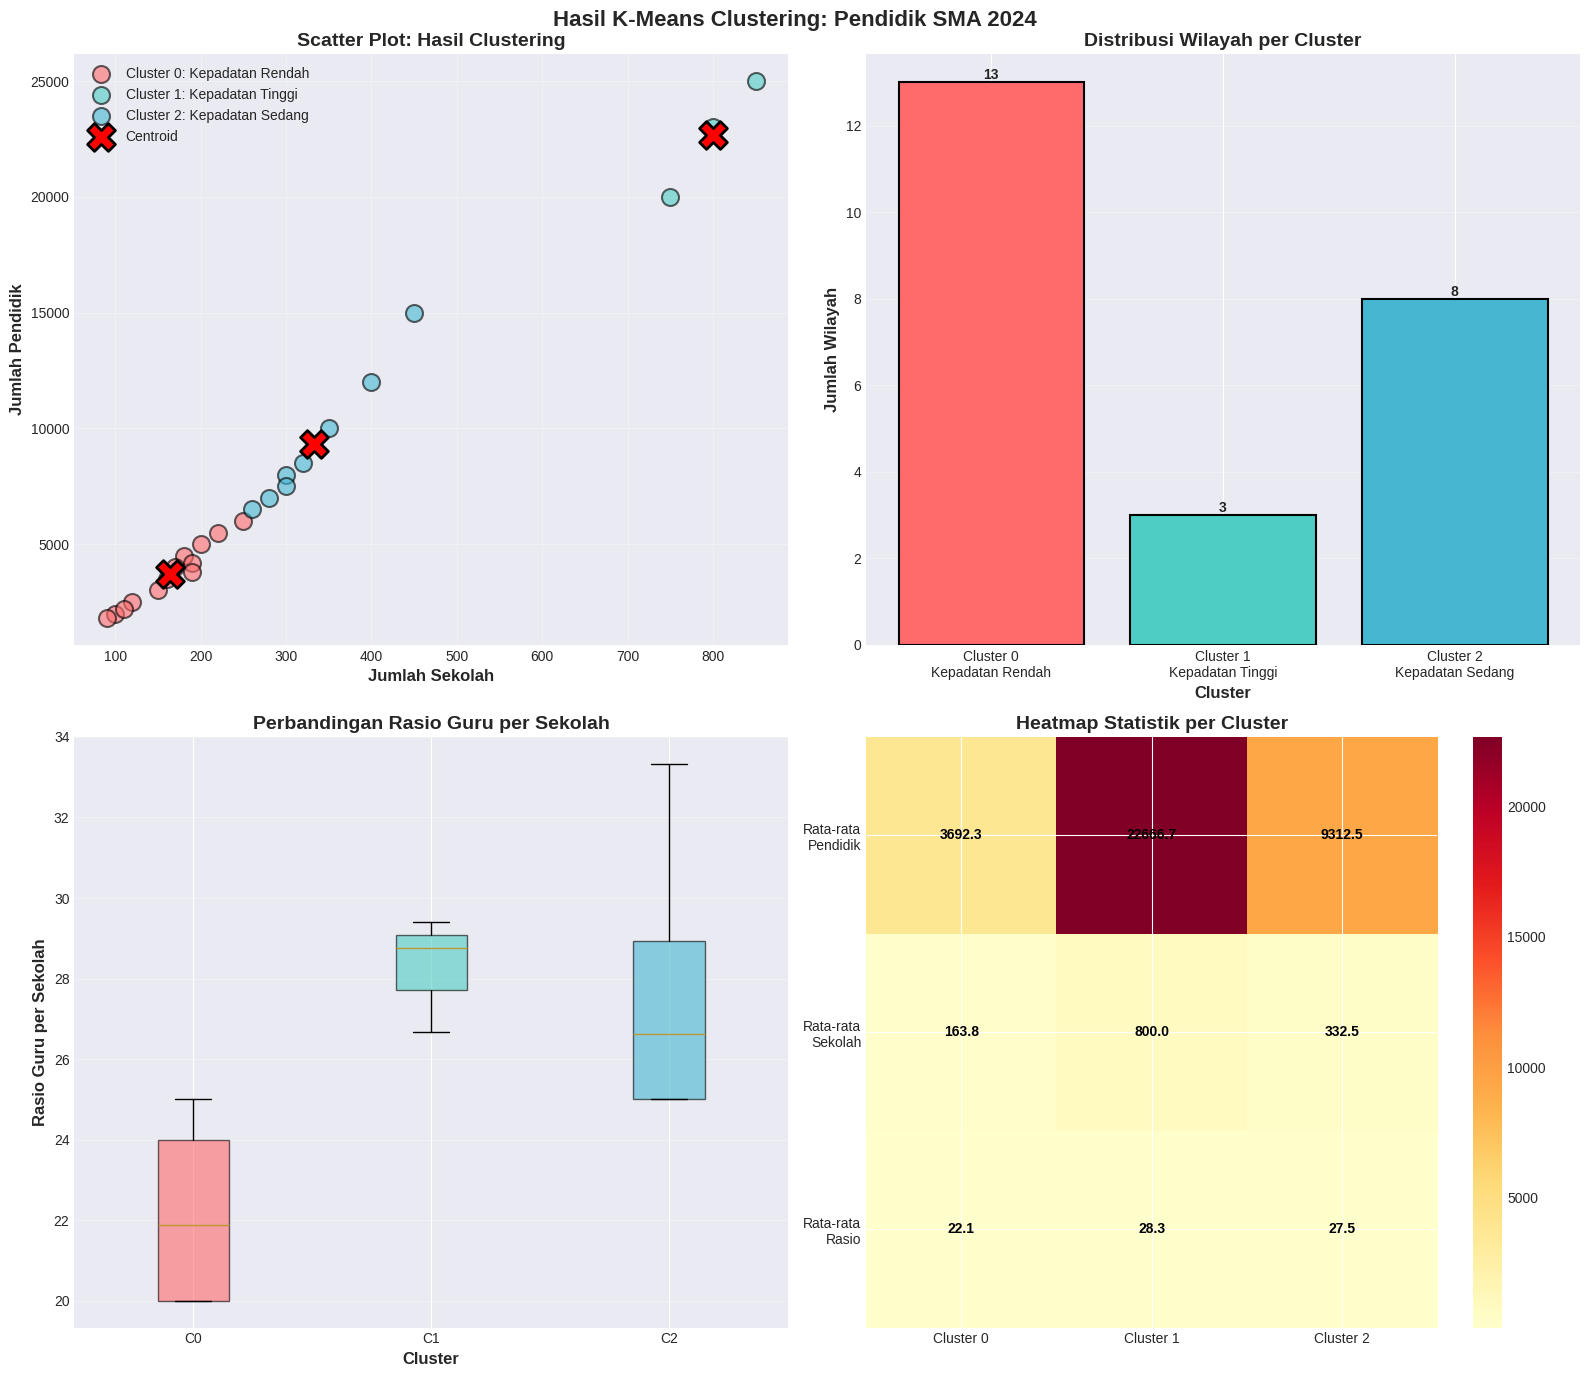


TABEL HASIL CLUSTERING

 Hasil Lengkap Clustering:
           wilayah  jumlah_pendidik  jumlah_sekolah  rasio_guru_per_sekolah  cluster    label_cluster
  Kalimantan Timur             5000             200               25.000000        0 Kepadatan Rendah
              Bali             6000             250               24.000000        0 Kepadatan Rendah
    Sulawesi Utara             4000             170               23.529412        0 Kepadatan Rendah
Kalimantan Selatan             5500             220               25.000000        0 Kepadatan Rendah
               NTB             4500             180               25.000000        0 Kepadatan Rendah
             Papua             3000             150               20.000000        0 Kepadatan Rendah
            Maluku             2500             120               20.833333        0 Kepadatan Rendah
             Jambi             4200             190               22.105263        0 Kepadatan Rendah
               NTT            

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File berhasil didownload!

ANALISIS SELESAI!


In [2]:
# K-Means Clustering: Jumlah Pendidik SMA 2024
# Analisis Pengelompokan Wilayah Berdasarkan Data Pendidik

# ==========================================
# 1. IMPORT LIBRARY
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ==========================================
# 2. LOAD DATA
# ==========================================
# Contoh 1: Upload file dari komputer lokal
from google.colab import files
print("Upload file CSV Anda (atau skip untuk menggunakan data contoh)")
print("Format kolom: wilayah, jumlah_pendidik, jumlah_sekolah")

# Uncomment baris di bawah untuk upload file
# uploaded = files.upload()
# df = pd.read_csv(list(uploaded.keys())[0])

# Data contoh (hapus jika sudah upload file sendiri)
data_contoh = {
    'wilayah': ['DKI Jakarta', 'Jawa Barat', 'Jawa Tengah', 'Jawa Timur',
                'Sumatera Utara', 'Banten', 'Sulawesi Selatan', 'Kalimantan Timur',
                'Papua', 'Maluku', 'Bali', 'NTB', 'Lampung', 'Riau',
                'Sulawesi Utara', 'Kalimantan Selatan', 'Jambi', 'Bengkulu',
                'Aceh', 'Sumatera Barat', 'NTT', 'Papua Barat', 'Gorontalo', 'Maluku Utara'],
    'jumlah_pendidik': [15000, 25000, 20000, 23000, 12000, 10000, 8000, 5000,
                        3000, 2500, 6000, 4500, 7000, 6500, 4000, 5500, 4200, 3500,
                        8500, 7500, 3800, 2000, 1800, 2200],
    'jumlah_sekolah': [450, 850, 750, 800, 400, 350, 300, 200,
                       150, 120, 250, 180, 280, 260, 170, 220, 190, 160,
                       320, 300, 190, 100, 90, 110]
}

df = pd.DataFrame(data_contoh)

# ==========================================
# 3. EKSPLORASI DATA
# ==========================================
print("\n" + "="*60)
print("EKSPLORASI DATA AWAL")
print("="*60)
print("\n 5 Data Teratas:")
print(df.head())

print("\n Statistik Deskriptif:")
print(df.describe())

print("\n Info Dataset:")
print(df.info())

print(f"\n Jumlah data: {len(df)} wilayah")
print(f" Tidak ada missing value: {df.isnull().sum().sum() == 0}")

# Hitung rasio guru per sekolah
df['rasio_guru_per_sekolah'] = df['jumlah_pendidik'] / df['jumlah_sekolah']

# ==========================================
# 4. VISUALISASI DATA AWAL
# ==========================================
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Eksplorasi Data Pendidik SMA 2024', fontsize=16, fontweight='bold')

# Plot 1: Scatter plot
axes[0, 0].scatter(df['jumlah_sekolah'], df['jumlah_pendidik'],
                   alpha=0.6, s=100, c='steelblue', edgecolors='black')
axes[0, 0].set_xlabel('Jumlah Sekolah', fontsize=12)
axes[0, 0].set_ylabel('Jumlah Pendidik', fontsize=12)
axes[0, 0].set_title('Distribusi Pendidik vs Sekolah', fontsize=14)
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Top 10 wilayah berdasarkan jumlah pendidik
top_10 = df.nlargest(10, 'jumlah_pendidik')
axes[0, 1].barh(top_10['wilayah'], top_10['jumlah_pendidik'], color='coral')
axes[0, 1].set_xlabel('Jumlah Pendidik', fontsize=12)
axes[0, 1].set_title('Top 10 Wilayah: Jumlah Pendidik', fontsize=14)
axes[0, 1].grid(True, alpha=0.3, axis='x')

# Plot 3: Distribusi rasio guru per sekolah
axes[1, 0].hist(df['rasio_guru_per_sekolah'], bins=15, color='lightgreen',
                edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Rasio Guru per Sekolah', fontsize=12)
axes[1, 0].set_ylabel('Frekuensi', fontsize=12)
axes[1, 0].set_title('Distribusi Rasio Guru per Sekolah', fontsize=14)
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Box plot
box_data = [df['jumlah_pendidik'], df['jumlah_sekolah']]
axes[1, 1].boxplot(box_data, labels=['Jumlah Pendidik', 'Jumlah Sekolah'])
axes[1, 1].set_ylabel('Nilai', fontsize=12)
axes[1, 1].set_title('Box Plot: Deteksi Outlier', fontsize=14)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ==========================================
# 5. PERSIAPAN DATA UNTUK CLUSTERING
# ==========================================
print("\n" + "="*60)
print("PERSIAPAN DATA")
print("="*60)

# Pilih fitur untuk clustering
features = ['jumlah_pendidik', 'jumlah_sekolah']
X = df[features].values

print(f"\n Fitur yang digunakan: {features}")
print(f" Shape data: {X.shape}")

# Normalisasi data menggunakan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\n Data sebelum normalisasi (5 data pertama):")
print(X[:5])
print("\n Data setelah normalisasi (5 data pertama):")
print(X_scaled[:5])

# ==========================================
# 6. MENENTUKAN JUMLAH CLUSTER OPTIMAL (ELBOW METHOD)
# ==========================================
print("\n" + "="*60)
print("MENENTUKAN JUMLAH CLUSTER OPTIMAL")
print("="*60)

# Hitung inertia untuk berbagai nilai K
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Visualisasi Elbow Method dan Silhouette Score
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Elbow Method
axes[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Jumlah Cluster (K)', fontsize=12)
axes[0].set_ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
axes[0].set_title('Elbow Method untuk Menentukan K Optimal', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].axvline(x=3, color='r', linestyle='--', label='K=3 (Rekomendasi)')
axes[0].legend()

# Silhouette Score
axes[1].plot(K_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
axes[1].set_xlabel('Jumlah Cluster (K)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Score untuk Berbagai K', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].axvline(x=3, color='r', linestyle='--', label='K=3 (Rekomendasi)')
axes[1].legend()

plt.tight_layout()
plt.show()

# Tampilkan tabel evaluasi
eval_df = pd.DataFrame({
    'K': list(K_range),
    'Inertia': inertias,
    'Silhouette Score': silhouette_scores
})
print("\n Evaluasi untuk berbagai K:")
print(eval_df.to_string(index=False))

# ==========================================
# 7. IMPLEMENTASI K-MEANS CLUSTERING
# ==========================================
print("\n" + "="*60)
print("IMPLEMENTASI K-MEANS CLUSTERING")
print("="*60)

# Pilih jumlah cluster optimal (bisa diubah sesuai analisis)
optimal_k = 3
print(f"\n Jumlah cluster yang dipilih: K = {optimal_k}")

# Terapkan K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Informasi clustering
print(f"\n Clustering selesai!")
print(f" Jumlah iterasi: {kmeans.n_iter_}")
print(f" Inertia: {kmeans.inertia_:.2f}")
print(f" Silhouette Score: {silhouette_score(X_scaled, df['cluster']):.3f}")
print(f" Davies-Bouldin Index: {davies_bouldin_score(X_scaled, df['cluster']):.3f}")

# ==========================================
# 8. ANALISIS HASIL CLUSTERING
# ==========================================
print("\n" + "="*60)
print("ANALISIS HASIL CLUSTERING")
print("="*60)

# Statistik per cluster
for i in range(optimal_k):
    cluster_data = df[df['cluster'] == i]
    print(f"\n{'='*60}")
    print(f" CLUSTER {i}")
    print(f"{'='*60}")
    print(f"Jumlah wilayah: {len(cluster_data)}")
    print(f"Rata-rata jumlah pendidik: {cluster_data['jumlah_pendidik'].mean():.0f}")
    print(f"Rata-rata jumlah sekolah: {cluster_data['jumlah_sekolah'].mean():.0f}")
    print(f"Rata-rata rasio guru/sekolah: {cluster_data['rasio_guru_per_sekolah'].mean():.2f}")
    print(f"\nWilayah dalam cluster:")
    for wilayah in cluster_data['wilayah'].values:
        print(f"  • {wilayah}")

# Buat label cluster yang lebih deskriptif
cluster_labels = {}
for i in range(optimal_k):
    avg_pendidik = df[df['cluster'] == i]['jumlah_pendidik'].mean()
    if avg_pendidik > 15000:
        cluster_labels[i] = 'Kepadatan Tinggi'
    elif avg_pendidik > 7000:
        cluster_labels[i] = 'Kepadatan Sedang'
    else:
        cluster_labels[i] = 'Kepadatan Rendah'

df['label_cluster'] = df['cluster'].map(cluster_labels)

# ==========================================
# 9. VISUALISASI HASIL CLUSTERING
# ==========================================
print("\n" + "="*60)
print("VISUALISASI HASIL CLUSTERING")
print("="*60)

fig, axes = plt.subplots(2, 2, figsize=(16, 14))
fig.suptitle('Hasil K-Means Clustering: Pendidik SMA 2024',
             fontsize=16, fontweight='bold')

# Plot 1: Scatter plot dengan cluster
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
for i in range(optimal_k):
    cluster_data = df[df['cluster'] == i]
    axes[0, 0].scatter(cluster_data['jumlah_sekolah'],
                      cluster_data['jumlah_pendidik'],
                      label=f'Cluster {i}: {cluster_labels[i]}',
                      alpha=0.6, s=150, c=colors[i], edgecolors='black', linewidth=1.5)

# Plot centroid
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
axes[0, 0].scatter(centroids[:, 1], centroids[:, 0],
                  marker='X', s=400, c='red', edgecolors='black',
                  linewidth=2, label='Centroid', zorder=5)

axes[0, 0].set_xlabel('Jumlah Sekolah', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Jumlah Pendidik', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Scatter Plot: Hasil Clustering', fontsize=14, fontweight='bold')
axes[0, 0].legend(loc='best', fontsize=10)
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Distribusi wilayah per cluster
cluster_counts = df['cluster'].value_counts().sort_index()
bars = axes[0, 1].bar(range(optimal_k), cluster_counts.values,
                      color=colors[:optimal_k], edgecolor='black', linewidth=1.5)
axes[0, 1].set_xlabel('Cluster', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Jumlah Wilayah', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Distribusi Wilayah per Cluster', fontsize=14, fontweight='bold')
axes[0, 1].set_xticks(range(optimal_k))
axes[0, 1].set_xticklabels([f'Cluster {i}\n{cluster_labels[i]}'
                            for i in range(optimal_k)])
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Tambahkan nilai di atas bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height,
                   f'{int(height)}',
                   ha='center', va='bottom', fontweight='bold')

# Plot 3: Box plot rasio guru per sekolah per cluster
cluster_data_list = [df[df['cluster'] == i]['rasio_guru_per_sekolah'].values
                     for i in range(optimal_k)]
bp = axes[1, 0].boxplot(cluster_data_list, patch_artist=True,
                        labels=[f'C{i}' for i in range(optimal_k)])

for patch, color in zip(bp['boxes'], colors[:optimal_k]):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)

axes[1, 0].set_xlabel('Cluster', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Rasio Guru per Sekolah', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Perbandingan Rasio Guru per Sekolah', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Plot 4: Heatmap statistik cluster
stats_data = []
for i in range(optimal_k):
    cluster_df = df[df['cluster'] == i]
    stats_data.append([
        cluster_df['jumlah_pendidik'].mean(),
        cluster_df['jumlah_sekolah'].mean(),
        cluster_df['rasio_guru_per_sekolah'].mean()
    ])

stats_matrix = np.array(stats_data).T
im = axes[1, 1].imshow(stats_matrix, cmap='YlOrRd', aspect='auto')
axes[1, 1].set_xticks(range(optimal_k))
axes[1, 1].set_xticklabels([f'Cluster {i}' for i in range(optimal_k)])
axes[1, 1].set_yticks(range(3))
axes[1, 1].set_yticklabels(['Rata-rata\nPendidik', 'Rata-rata\nSekolah',
                            'Rata-rata\nRasio'])
axes[1, 1].set_title('Heatmap Statistik per Cluster', fontsize=14, fontweight='bold')

# Tambahkan nilai di dalam heatmap
for i in range(3):
    for j in range(optimal_k):
        text = axes[1, 1].text(j, i, f'{stats_matrix[i, j]:.1f}',
                              ha="center", va="center", color="black",
                              fontweight='bold', fontsize=10)

plt.colorbar(im, ax=axes[1, 1])
plt.tight_layout()
plt.show()

# ==========================================
# 10. TABEL HASIL CLUSTERING
# ==========================================
print("\n" + "="*60)
print("TABEL HASIL CLUSTERING")
print("="*60)

# Urutkan berdasarkan cluster
hasil_df = df[['wilayah', 'jumlah_pendidik', 'jumlah_sekolah',
               'rasio_guru_per_sekolah', 'cluster', 'label_cluster']].sort_values('cluster')

print("\n Hasil Lengkap Clustering:")
print(hasil_df.to_string(index=False))

# Ringkasan per cluster
print("\n" + "="*60)
print("RINGKASAN STATISTIK PER CLUSTER")
print("="*60)

summary = df.groupby('cluster').agg({
    'wilayah': 'count',
    'jumlah_pendidik': ['mean', 'min', 'max'],
    'jumlah_sekolah': ['mean', 'min', 'max'],
    'rasio_guru_per_sekolah': ['mean', 'min', 'max']
}).round(2)

print(summary)

# ==========================================
# 11. INTERPRETASI DAN REKOMENDASI
# ==========================================
print("\n" + "="*60)
print("INTERPRETASI & REKOMENDASI")
print("="*60)

for i in range(optimal_k):
    cluster_df = df[df['cluster'] == i]
    avg_rasio = cluster_df['rasio_guru_per_sekolah'].mean()

    print(f"\n Cluster {i} - {cluster_labels[i]}:")
    print(f"   • Jumlah wilayah: {len(cluster_df)}")
    print(f"   • Rasio rata-rata: {avg_rasio:.2f} guru per sekolah")

    if avg_rasio < 25:
        print(f"   REKOMENDASI: Wilayah ini memerlukan PENAMBAHAN guru")
        print(f"      Rasio di bawah standar nasional (25-30 guru/sekolah)")
    elif avg_rasio > 35:
        print(f"   REKOMENDASI: Wilayah ini SURPLUS guru")
        print(f"      Pertimbangkan redistribusi ke wilayah kekurangan")
    else:
        print(f"   ✓ STATUS: Rasio guru sudah dalam batas ideal")

# ==========================================
# 12. EXPORT HASIL
# ==========================================
print("\n" + "="*60)
print("EXPORT HASIL")
print("="*60)

# Simpan hasil ke CSV
hasil_df.to_csv('hasil_clustering_pendidik_sma_2024.csv', index=False)
print("Hasil clustering telah disimpan ke: hasil_clustering_pendidik_sma_2024.csv")

# Download file (khusus Google Colab)
try:
    files.download('hasil_clustering_pendidik_sma_2024.csv')
    print("File berhasil didownload!")
except:
    print("Jalankan di Google Colab untuk auto-download")

print("\n" + "="*60)
print("ANALISIS SELESAI!")
print("="*60)